## Questions I'd love to answer doing the analysis of this dataset

1. Is there a pay gap in STEM jobs?

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("STEM_Salary_Data.csv")

In [4]:
# set the maximum number of columns to display
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


The gender column contains NaN values. So let's create a new dataset from the old one but not include the NaN values

In [6]:
df_new = df.dropna(subset=['gender'])

In [7]:
df_new.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
264,4/12/2018 16:15:32,GE Digital,Senior,Software Engineer,140000,"San Ramon, CA",4.0,4.0,NaN,130000.0,0.0,10000.0,Male,NaN,7430,807.0,479,0,0,0,0,0,0,0,0,0,0,NaN,NaN
265,4/12/2018 23:19:33,Amazon,L5,Software Engineer,172000,"Seattle, WA",12.0,2.0,NaN,142000.0,30000.0,0.0,Male,"SDET, not SDE",11527,819.0,480,0,0,0,0,0,0,0,0,0,0,NaN,NaN
266,4/13/2018 6:32:17,Uber,L5,Software Engineer,325000,"San Francisco, CA",7.0,2.0,NaN,161000.0,140000.0,25000.0,Male,NaN,7419,807.0,481,0,0,0,0,0,0,0,0,0,0,NaN,NaN
269,4/14/2018 13:05:22,Microsoft,60,Software Engineer,150000,"Seattle, WA",4.0,0.0,NaN,118000.0,5000.0,12000.0,Male,NaN,11527,819.0,486,0,0,0,0,0,0,0,0,0,0,NaN,NaN
270,4/15/2018 11:47:53,Google,L6,Software Engineer,640000,"Mountain View, CA",11.0,4.0,NaN,210000.0,380000.0,50000.0,Male,NaN,7322,807.0,489,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [8]:
df_new["gender"].unique()

array(['Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [9]:
df_new["gender"].value_counts()

Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

It seems that a majority of data points are male (35000) while only 7000 data points are female

Let's select the relevant columns for our analysis, which includes gender, job title, and salary income

Obviously, we can also choose other relevant columns like location, years of experience, etc to do analyze the pay gap as well but doing this means that it can result in smaller sample sizes for some groups, which can impact the reliability of our findings

In [21]:
# Select relevant columns
df1 = df_new.loc[:, ['gender', 'totalyearlycompensation', 'title']]

In [22]:
df1

,gender,totalyearlycompensation,title
264,Male,140000,Software Engineer
265,Male,172000,Software Engineer
266,Male,325000,Software Engineer
269,Male,150000,Software Engineer
270,Male,640000,Software Engineer
...,...,...,...
62610,Male,135000,Software Engineer
62611,Male,350000,Software Engineer
62612,Female,305000,Product Manager
62613,Male,152000,Software Engineer


Group the data by ender and job title, and calculate the mean salary for each group

In [24]:
groups = df1.groupby(['gender', 'title'])['totalyearlycompensation'].mean()

Calculate the gender pay gap as percentage difference between the mean salary for men and women

In [26]:
pay_gap_in_percentage = (groups['Male'] - groups['Female']) / groups['Male'] * 100

plot the pay gap by job title using a bar chart

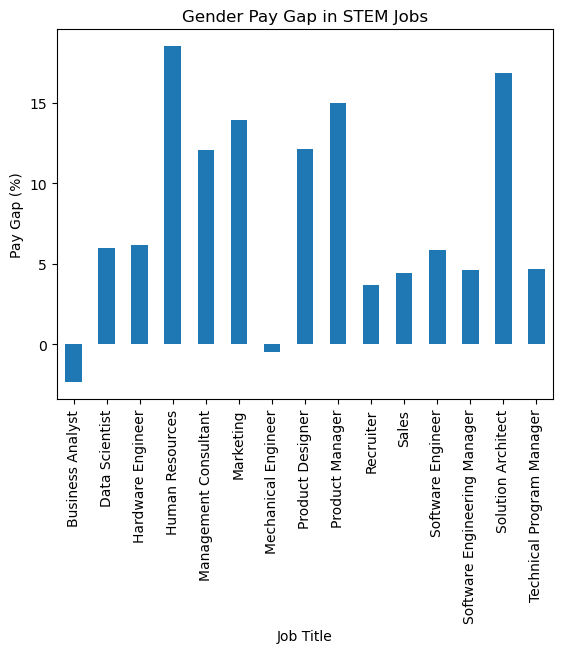

In [28]:
import matplotlib.pyplot as plt

pay_gap_in_percentage.plot(kind='bar')
plt.title('Gender Pay Gap in STEM Jobs')
plt.xlabel('Job Title')
plt.ylabel('Pay Gap (%)')
plt.show()

calculate the absolute difference in mean salary between men and women

In [29]:
pay_diff_in_absolute = groups['Male'] - groups['Female']

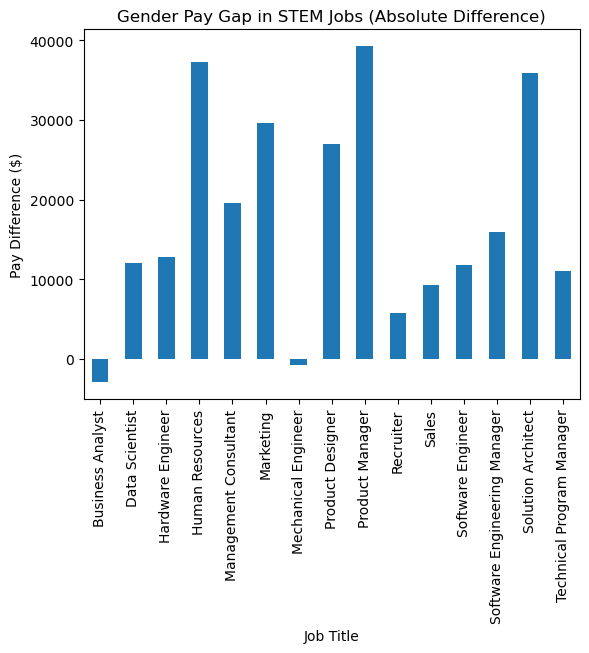

In [30]:
# plot the absolute pay difference by job title using a bar chart
pay_diff_in_absolute.plot(kind='bar')
plt.title('Gender Pay Gap in STEM Jobs (Absolute Difference)')
plt.xlabel('Job Title')
plt.ylabel('Pay Difference ($)')
plt.show()

After examining the bar chart, it is clear that there exists a pay gap between genders. While the positions of Business Analyst and Mechanical Engineer appear to have no pay gap, there is a considerable gap in positions such as Human Resources, Solution Architect, Product Manager, and Marketing, with pay differences ranging from approximately 15% to 20%. This is quivalent to absolute values of $30000 to $40000.